# Polynomial Regression


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

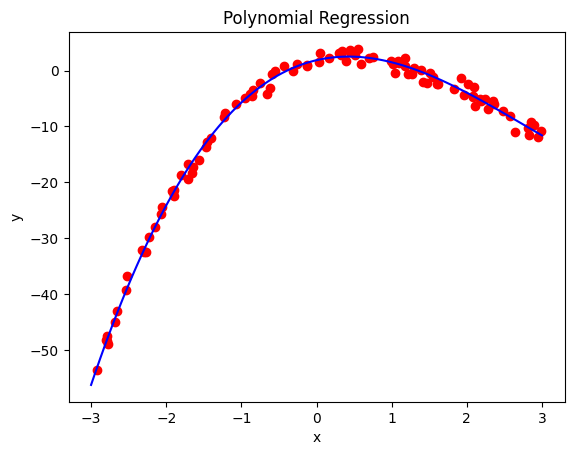

In [ ]:
#Generating random 2D array
x = 6 * np.random.rand(100, 1) - 3

#Generating values of y which follow a specific curve
y = 2 + 3*x - 4*x**2 + 0.5*x**3 + np.random.randn(100, 1)

#Transforming values of x into a 2D array with values of coefficients of x
poly_features = PolynomialFeatures(degree = 3, include_bias = False)
x_poly = poly_features.fit_transform(x)

reg = LinearRegression()
reg.fit(x_poly, y)

w0 = reg.intercept_[0]
w1 = reg.coef_[0][0]
w2 = reg.coef_[0][1]
w3 = reg.coef_[0][2]

# Plotting the data and model
plt.figure()
plt.plot(x, y, 'ro')
x_line = np.linspace(-3, 3, 100)
y_line = w0 + w1*x_line + w2*x_line**2 + w3*x_line**3
plt.plot(x_line, y_line, 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.show()

# Bias-Variance Trade off

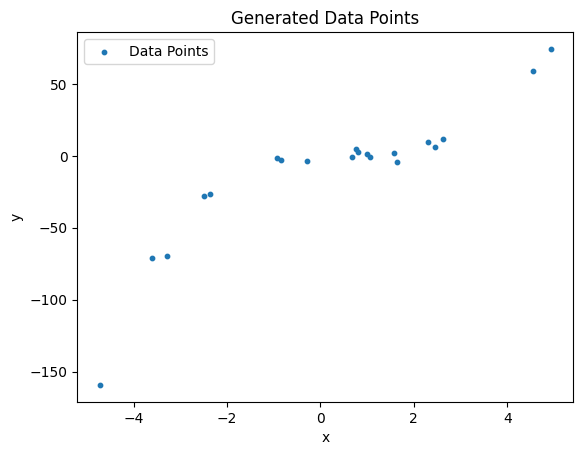

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(0)

# Generating x values from a normal distribution, scaled and shifted
x = 2 - 3 * np.random.normal(0, 1, 20)
#np.random.normal (0,1,20) generates array with 20 elements with mean 0 and std deviation 1

y = 3 + 1.5 * x - 2 * (x ** 2) + x ** 3 + np.random.normal(-3, 3, 20)

# Scatter plot of the generated data points
plt.scatter(x, y, s=10, label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data Points')
plt.legend()
plt.show()


 First let us try fitting a straight line to the generated data points

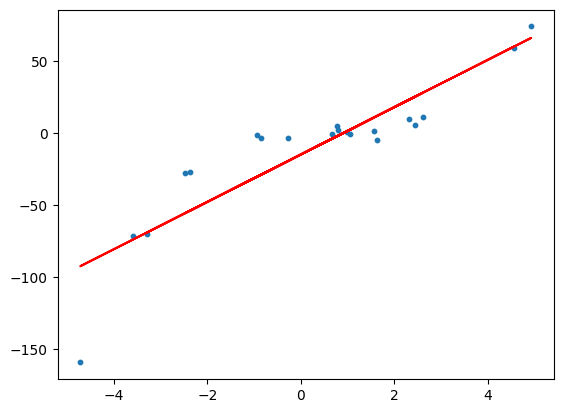

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = 3 + 1.5 * x - 2 * (x ** 2) + x ** 3 + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

As evident from the graph above, We can see that the straight line is simply not able to capture the patterns in the data. This is a case of under-fitting. Now let us try adding a quadratic feature.

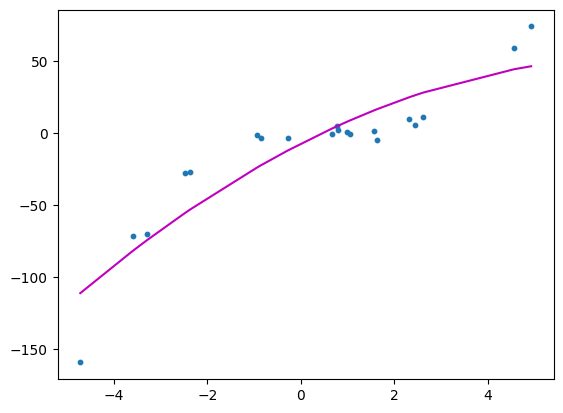

In [ ]:
import operator
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = 3 + 1.5 * x - 2 * (x ** 2) + x ** 3 + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

### Now let's include a biquadratic feature and observe the resulting graph

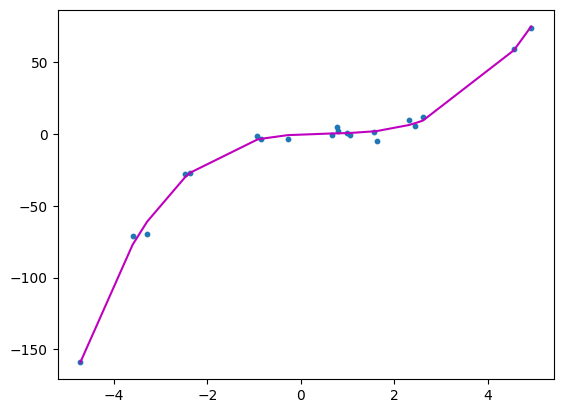

In [ ]:
import operator
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = 3 + 1.5 * x - 2 * (x ** 2) + x ** 3 + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

### Now let us try fitting a degree 10 polynomial

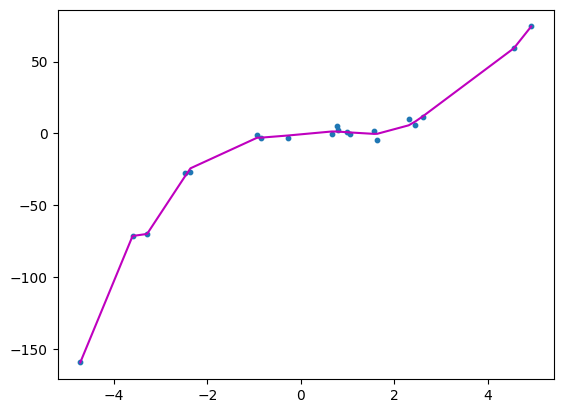

In [ ]:
import operator
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = 3 + 1.5 * x - 2 * (x ** 2) + x ** 3 + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

### As it can be observed from the graph, the plot tries to pass through all the data points thereby increasing the variance of the model. Now let us try a higher power like 25.

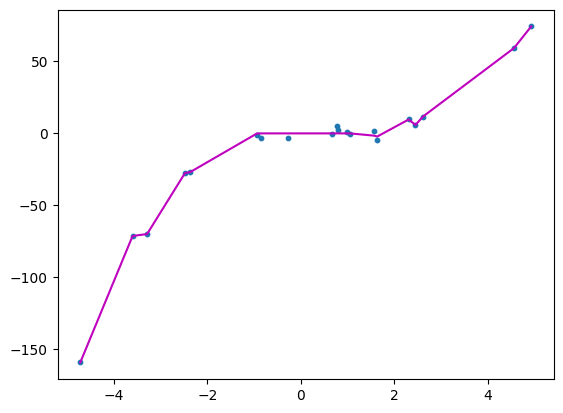

In [ ]:
import operator
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = 3 + 1.5 * x - 2 * (x ** 2) + x ** 3 + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=25)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

### The model appears to have learned the training data very well, fitting almost all the points precisely. However, it's likely to perform poorly on new data because it has captured unnecessary patterns. Moreover, even slight changes to the training data could result in an entirely different function, making the model's output useless. This is a classic example of overfitting.